<a href="https://colab.research.google.com/github/alchemy110/DeepLearning_Practical/blob/main/muliclass_CNN(opt).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CNN in FashionMNIST dataset(opt)

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import layers, Model
from tensorflow.keras import Input
from tensorflow.keras.utils  import to_categorical
import numpy as np
from keras.layers import Dropout
from keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2

## Data Preparation

In [2]:
%%capture
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
train_images.shape

(60000, 28, 28)

In [3]:
train_images = train_images.reshape(60000, 28, 28)
train_images = train_images.astype("float32") / 255.0
test_images = test_images.reshape(10000, 28, 28)
test_images = test_images.astype("float32") / 255.0

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
test_labels.shape

(10000, 10)

## Model Design

In [4]:
inp = Input(shape=(28, 28, 1))
# change 64 to 32 &change kernel_regularizer to 0.001
x = layers.Conv2D(32,(3, 3), padding='same', kernel_regularizer=l2(0.001))(inp)
# add batch normalizaation layer
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
# change to conv 64
x = layers.Conv2D(64,(3 ,3), activation='relu', padding='same')(x)
# add batch normalizaation layer
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D()(x)
x = layers.Flatten()(x)
# add dropout 0.5
x= layers.Dropout(0.5)(x)
x = layers.Dense(64, activation='relu',kernel_regularizer =l2(0.001))(x)
out = layers.Dense(10, activation='softmax')(x)

model_cnn = Model(inputs=inp, outputs=out)
model_cnn.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 28, 28, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496 

## Train CNN model

In [5]:
from tensorflow.keras import optimizers
from  tensorflow.keras.optimizers  import  Adam
model_cnn.compile(optimizer="adam", loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [6]:
history = model_cnn.fit (train_images, train_labels,
                         epochs=30, batch_size=512,
                         validation_data=(test_images, test_labels))

Epoch 1/30
118/118 [==============================] - 15s 20ms/step - loss: 0.7770 - accuracy: 0.7806 - val_loss: 2.3219 - val_accuracy: 0.6509
Epoch 2/30
118/118 [==============================] - 2s 16ms/step - loss: 0.4728 - accuracy: 0.8657 - val_loss: 1.9814 - val_accuracy: 0.7460
Epoch 3/30
118/118 [==============================] - 2s 16ms/step - loss: 0.4063 - accuracy: 0.8850 - val_loss: 1.1531 - val_accuracy: 0.8169
Epoch 4/30
118/118 [==============================] - 2s 17ms/step - loss: 0.3679 - accuracy: 0.8942 - val_loss: 0.5938 - val_accuracy: 0.8866
Epoch 5/30
118/118 [==============================] - 2s 17ms/step - loss: 0.3440 - accuracy: 0.9000 - val_loss: 0.4681 - val_accuracy: 0.8422
Epoch 6/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3199 - accuracy: 0.9057 - val_loss: 0.3331 - val_accuracy: 0.9021
Epoch 7/30
118/118 [==============================] - 2s 16ms/step - loss: 0.3036 - accuracy: 0.9098 - val_loss: 0.3679 - val_accuracy: 0.885

## Evaluation of CNN model

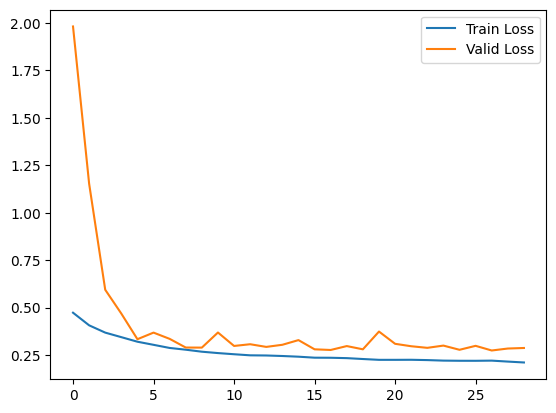

In [8]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'][1:], label='Train Loss')
plt.plot(history.history['val_loss'][1:], label='Valid Loss')
plt.legend()

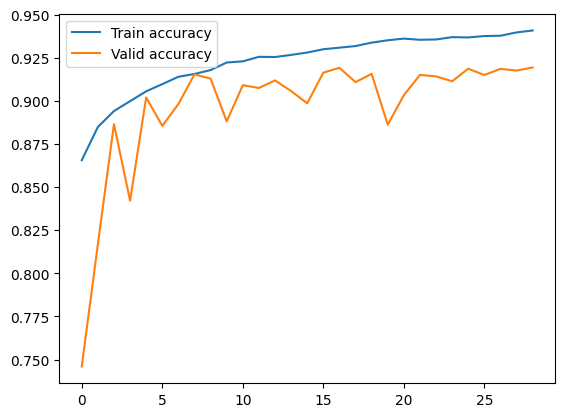

In [9]:
plt.plot(history.history['accuracy'][1:], label='Train accuracy')
plt.plot(history.history['val_accuracy'][1:], label='Valid accuracy')
plt.legend()

## Prediction

In [10]:
pred_cnn = model_cnn.predict(test_images)

313/313 [==============================] - 1s 2ms/step


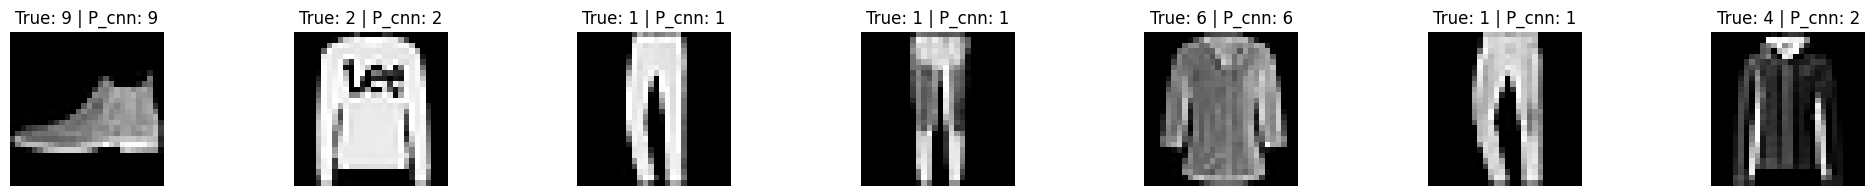

In [12]:
fig, axes = plt.subplots(1, 7, figsize=(25,2))
for i in range(len(axes)):
  axes[i].imshow(test_images[i], cmap='gray')
  axes[i].set_axis_off()

  title = f'True: {test_labels[i]} | P_cnn: {np.argmax(pred_cnn[i])}'
  axes[i].set_title(title)
